In [6]:
import math
import random

import numpy as np
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

In [7]:
# Settings for testing functions
B = 10
N = 6
M = 31
p = 2
c1 = 0.8
c2 = 1
u = 0
s = 0

In [8]:
def newsvendor_profit(A, d, y, p, c1, c2, u, s):
    # 实际提前订货A与常规订货y的收益
    if A + y >= d:
        newsvendor_profit = p * d - y * c2 - A * c1 + s * (A + y - d)
    else:
        newsvendor_profit = p * (y + A) - y * c2 - A * c1 - u * (d - A - y)
    return newsvendor_profit


# Test the function.
A = 5
d = 6
y = 3
print(newsvendor_profit(A, d, y, p, c1, c2, u, s))  # A + y >= d
d = 10
print(newsvendor_profit(A, d, y, p, c1, c2, u, s))  # A + y < d

5.0
9.0


In [9]:
def expert_profit(A, d, p, c1, c2, u, s, N):
    # 给定提前订货A,N+1个常规订货专家对应的收益
    value = []
    for i in range(0, N + 1):
        v = newsvendor_profit(A, d, i, p, c1, c2, u, s)
        value.append(v)
    return value


# Test the function.
A = 5
d = 6
N = 5 # 常规订货专家上界即专家有{0，1，2，3，4，5}
print(expert_profit(A, d, p, c1, c2, u, s, N)) 
N = 8
print(expert_profit(A, d, p, c1, c2, u, s, N))

[6.0, 7.0, 6.0, 5.0, 4.0, 3.0]
[6.0, 7.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.0, 0.0]


In [10]:
def profit_matrix(d, p, c1, c2, u, s, B):
    # 计算每期 各个专家对（A，y）的收益，用矩阵表示
    matrix = np.zeros((B + 1, B + 1))
    for j in range(B + 1):
        for i in range(B - j + 1):
            v = newsvendor_profit(j, d, i, p, c1, c2, u, s)
            matrix[j, i] = v
    return matrix


# Test the function.
d = 4
print(profit_matrix(d, p, c1, c2, u, s, B)) # 矩阵横坐标为提前订货专家/纵坐标为常规订货专家
d = 8
print(profit_matrix(d, p, c1, c2, u, s, B))

[[ 0.   1.   2.   3.   4.   3.   2.   1.   0.  -1.  -2. ]
 [ 1.2  2.2  3.2  4.2  3.2  2.2  1.2  0.2 -0.8 -1.8  0. ]
 [ 2.4  3.4  4.4  3.4  2.4  1.4  0.4 -0.6 -1.6  0.   0. ]
 [ 3.6  4.6  3.6  2.6  1.6  0.6 -0.4 -1.4  0.   0.   0. ]
 [ 4.8  3.8  2.8  1.8  0.8 -0.2 -1.2  0.   0.   0.   0. ]
 [ 4.   3.   2.   1.   0.  -1.   0.   0.   0.   0.   0. ]
 [ 3.2  2.2  1.2  0.2 -0.8  0.   0.   0.   0.   0.   0. ]
 [ 2.4  1.4  0.4 -0.6  0.   0.   0.   0.   0.   0.   0. ]
 [ 1.6  0.6 -0.4  0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.8 -0.2  0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]]
[[0.  1.  2.  3.  4.  5.  6.  7.  8.  7.  6. ]
 [1.2 2.2 3.2 4.2 5.2 6.2 7.2 8.2 7.2 6.2 0. ]
 [2.4 3.4 4.4 5.4 6.4 7.4 8.4 7.4 6.4 0.  0. ]
 [3.6 4.6 5.6 6.6 7.6 8.6 7.6 6.6 0.  0.  0. ]
 [4.8 5.8 6.8 7.8 8.8 7.8 6.8 0.  0.  0.  0. ]
 [6.  7.  8.  9.  8.  7.  0.  0.  0.  0.  0. ]
 [7.2 8.2 9.2 8.2 7.2 0.  0.  0.  0.  0.  0. ]
 [8.4 9.4 8.4 7.4 0.  0.  0.  0.

In [11]:
def weight_update(i, j, init_w, accum_profit):
    # 输出每个阶段或时段的对应专家的权重
    weights = []
    for a in range(1, j + 2):
        weight = init_w[a - 1] * math.exp(accum_profit[a - 1] / math.sqrt(i))  
        weights.append(weight)
    tot_weights = np.sum(weights)
    new_weights = [weights[b] / tot_weights for b in range(len(weights))]

    return new_weights


# Test the function.
i = 2    # 更新第i个stage的提前订货量，对于常规订货更新而言 更新第i个periods的提前订货量
j = 4     # 表示对应的提前订货专家的上界或常规订货专家的上界，因为一般还有一个专家0，所以实际执行的专家数为j+1即为5个
init_w = [0.2, 0.2, 0.2, 0.2, 0.2] # 五个专家对应的初始权重
accum_profit = [10, 14, 18, 12, 8] # 五个专家对应的累计收益
print(weight_update(i, j, init_w, accum_profit)) 
i = 4
print(weight_update(i, j, init_w, accum_profit))

[0.003241260366512843, 0.054838328843630595, 0.9278002907238059, 0.01333211543029304, 0.0007880046357576467]
[0.01513469101582659, 0.1118310809559244, 0.8263261307873805, 0.041140355567663794, 0.005567741673204735]


In [12]:
def action(j, weights):
    # 计算Decision-maker的执行订货量
    value = 0
    for c in range(j + 1):
        value += c * weights[c]

    predict_a = int(round(value))

    return predict_a


# Test the function.
j = 4     # 对于提前订货而言，为提前订货的的专家的上界；对于常规订货而言，为常规订货的专家上界，
          # 因为一般还有一个专家0，所以实际执行的专家数为j+1即为5个
weights = [0.2, 0.4, 0.15, 0.15, 0.1] # 五个专家对应的权重
print(action(j, weights)) 

2


In [13]:
def advance_expert_profit(d, p, c1, c2, u, s, n, m, M, B, expert_profit_matrix):
    # 计算所有提前订货专家 theta 与其实际执行的常规订货 y  得到的收益，为列表
    # 并返回每个提前订货专家 theta 实际执行的常规订货 y，为列表
    yy_list = []  # 为输每个提前订货专家 theta 实际执行的常规订货 y而建
    profit_A_list = []
    for t in range(B + 1):
        #
        _varDelta = B - t
        _init_w_for_y = [1 / (_varDelta + 1)] * (_varDelta + 1)
        tmp_list = expert_profit_matrix[
            t,
        ].tolist()
        accum_profit_list = tmp_list[0 : _varDelta + 1]
        weights = weight_update(
            m + n * (M - 1), _varDelta, _init_w_for_y, accum_profit_list
        )
        y = action(_varDelta, weights)
        yy_list.append(y)
        _profit = newsvendor_profit(t, demand, y, p, c1, c2, u, s)
        profit_A_list.append(_profit)
    return yy_list, profit_A_list


# # Test the function. 已通过主函数验证该function有效性，因这里expert_profit_matrix不好随便设定
# d = 4
# n = 1  # stage
# m = 2  # period
# expert_profit_matrix  # 输入的收益矩阵 
 
# print(advance_expert_profit(d, p, c1, c2, u, s, n, m, M, B, expert_profit_matrix))

In [16]:
#Use to test and calculate one stage profit

B = 20
N = 1
M = 31
p = 1
c1 = 0.4
c2 = 0.5
u = 0
s = 0

stage_cumulative_profit = [0] * N
stage_cumulative_profit_for_WAA = [0] * N
stage_cumulative_profit_for_optimal = [0] * N
Num = 1
for num in range(Num):
    
#     list_1 = 0
#     list_2 = 0
#     list_3 = 0
    
    init_w_for_A = [1 / (B + 1)] * (B + 1)
    # 记录各个专家对 对应的累计收益
    expert_profit_matrix = np.zeros((B + 1, B + 1))
    # 记录每一个提前订货专家对应实际执行常规订货的时段动作得到的累计收益
    accum_profit_A_list = [0] * (B + 1)
    # 分阶段保存newsvendor收益
    profit_per_stage_list = [0] * N
    # WAA（不继承）的收益阶段保存
    profit_per_stage_list_WAA = [0] * N
    #
    for n in range(N):
        # 计算提前订货
        weights = weight_update(n + 1, B, init_w_for_A, accum_profit_A_list)
#         print("第", n + 1, "阶段期初各提前订货专家的权重", weights)
        A = action(B, weights)
#         print("第", n + 1, "阶段提前订货为:", A)
        # 存储真实收益
        profit = []
        # 不继承WAA方法真实收益
        profit_WAA = []
        # 对应常规订货专家集
        varDelta = B - A
        init_w_for_y = [1 / (varDelta + 1)] * (varDelta + 1)
        # 每一阶段重新初始化累计收益对不继承的WAA方法（不继承）
        accum_profit_list_WAA = [0] * (varDelta + 1)
        for m in range(1, M):
            # 跨阶段用于更新专家权重的累计收益值
            tmp_list = expert_profit_matrix[
                A,
            ].tolist()
            accum_profit_list = tmp_list[0 : varDelta + 1]
            # 计算newsvendor的真实订货量
            weights = weight_update(
                m + n * (M - 1), varDelta, init_w_for_y, accum_profit_list
            )
#             print(
#                 "第",
#                 int((m + n * (M - 1)) / 30) + 1,
#                 "阶段下第",
#                 m + n * (M - 1) - int((m + n * (M - 1)) / 30) * (M - 1),
#                 "时段常规订货专家的权重",
#                 weights,
# #             )
            y = action(varDelta, weights)
#             print("第", n + 1, "阶段下对应的第", m, "时段的常规订货量", y)
            # 不继承WAA方法的订货量（不继承）
            weights = weight_update(
                m + n * (M - 1), varDelta, init_w_for_y, accum_profit_list_WAA
            )
            y_WAA = action(varDelta, weights)
            # 产生需求
            #         tr_n= truncnorm((0-10)/2,(21-10)/2,10,2)
            #         demand=int(list(tr_n.rvs(1))[0])
            # 产生正态分布需求(5,2)
            demand = round(np.random.normal(10, 2))
            demand = np.maximum(demand, 0)
            demand = np.minimum(demand, B)
            # 产生均匀分布需求
#             demand = random.randint(0, 20)
            # y_WAA阶段内对应的专家收益累计
            expert_profit_WAA = expert_profit(A, demand, p, c1, c2, u, s, varDelta)
            accum_profit_list_WAA = [
                accum_profit_list_WAA[e] + expert_profit_WAA[e]
                for e in range(len(expert_profit_WAA))
            ]
            # 同时计算其余提前订货专家对应下的每个时期的常规订货
            yy_list, profit_A_list = advance_expert_profit(d, p, c1, c2, u, s, n, m, M, B, expert_profit_matrix)
            accum_profit_A_list = [accum_profit_A_list[k] + profit_A_list[k] for k in range(len(profit_A_list))]
    #         yy_list = []  # 为输出动作而建
    #         for t in range(B + 1):
    #             #
    #             _varDelta = B - t
    #             _init_w_for_y = [1 / (_varDelta + 1)] * (_varDelta + 1)
    #             tmp_list = expert_profit_matrix[
    #                 t,
    #             ].tolist()
    #             accum_profit_list = tmp_list[0 : _varDelta + 1]
    #             weights = weight_update(
    #                 m + n * (M - 1), _varDelta, _init_w_for_y, accum_profit_list
    #             )
    #             y = action(_varDelta, weights)
    #             yy_list.append(y)
    #             _profit = newsvendor_profit(t, demand, y, p, c1, c2, u, s)
    #             accum_profit_A_list[t] += _profit
            # 输出每个提前订货专家所对应的常规订货
#             print("第", n + 1, "阶段下各个提前订货专家对应的第", m, "时段的常规订货量", yy_list)
            # 各个专家对 对应的累计收益矩阵更新
            expert_profit_matrix += profit_matrix(demand, p, c1, c2, u, s, B)

            # 计算newsvendor的真实收益
            _profit = newsvendor_profit(A, demand, y, p, c1, c2, u, s)
            _profit_WAA = newsvendor_profit(A, demand, y_WAA, p, c1, c2, u, s)
            #       r=real_r2(z,demand,q,p,c1,c2,s,u)
            profit.append(_profit)
            profit_WAA.append(_profit_WAA)
            
        tmp_profit = np.sum(profit)
        profit_per_stage_list[n] = tmp_profit
        
        Total_profit = np.sum(profit_per_stage_list)
        list_2 = Total_profit
        stage_cumulative_profit[n] += list_2
        
        tmp_profit_WAA = np.sum(profit_WAA)
        profit_per_stage_list_WAA[n] = tmp_profit_WAA
        
        Total_profit_WAA = np.sum(profit_per_stage_list_WAA)
        list_1 = Total_profit_WAA
        stage_cumulative_profit_for_WAA[n] += list_1
        
        list_matrix = expert_profit_matrix[:, 0].tolist()
        list_3 = list_matrix[11]
        stage_cumulative_profit_for_optimal[n] += list_3

list_for_WAA_ = [i/Num for i in stage_cumulative_profit_for_WAA]
list_for_real_ = [i/Num for i in stage_cumulative_profit]
list_for_optimal_ = [i/Num for i in stage_cumulative_profit_for_optimal]

print(list_for_WAA_)
print(list_for_real_)
print(list_for_optimal_)

In [18]:
#get the table 1 in Section 4

B = 20
N = 18
M = 31
p = 1
c1 = 0.4
c2 = 0.5
u = 0
s = 0

stage_cumulative_profit = [0] * N
stage_cumulative_profit_for_WAA = [0] * N
stage_cumulative_profit_for_optimal = [0] * N
Num = 100
for num in range(Num):
    
#     list_1 = 0
#     list_2 = 0
#     list_3 = 0
    
    init_w_for_A = [1 / (B + 1)] * (B + 1)
    # 记录各个专家对 对应的累计收益
    expert_profit_matrix = np.zeros((B + 1, B + 1))
    # 记录每一个提前订货专家对应实际执行常规订货的时段动作得到的累计收益
    accum_profit_A_list = [0] * (B + 1)
    # 分阶段保存newsvendor收益
    profit_per_stage_list = [0] * N
    # WAA（不继承）的收益阶段保存
    profit_per_stage_list_WAA = [0] * N
    #
    for n in range(N):
        # 计算提前订货
        weights = weight_update(n + 1, B, init_w_for_A, accum_profit_A_list)
#         print("第", n + 1, "阶段期初各提前订货专家的权重", weights)
        A = action(B, weights)
#         print("第", n + 1, "阶段提前订货为:", A)
        # 存储真实收益
        profit = []
        # 不继承WAA方法真实收益
        profit_WAA = []
        # 对应常规订货专家集
        varDelta = B - A
        init_w_for_y = [1 / (varDelta + 1)] * (varDelta + 1)
        # 每一阶段重新初始化累计收益对不继承的WAA方法（不继承）
        accum_profit_list_WAA = [0] * (varDelta + 1)
        for m in range(1, M):
            # 跨阶段用于更新专家权重的累计收益值
            tmp_list = expert_profit_matrix[
                A,
            ].tolist()
            accum_profit_list = tmp_list[0 : varDelta + 1]
            # 计算newsvendor的真实订货量
            weights = weight_update(
                m + n * (M - 1), varDelta, init_w_for_y, accum_profit_list
            )
#             print(
#                 "第",
#                 int((m + n * (M - 1)) / 30) + 1,
#                 "阶段下第",
#                 m + n * (M - 1) - int((m + n * (M - 1)) / 30) * (M - 1),
#                 "时段常规订货专家的权重",
#                 weights,
# #             )
            y = action(varDelta, weights)
#             print("第", n + 1, "阶段下对应的第", m, "时段的常规订货量", y)
            # 不继承WAA方法的订货量（不继承）
            weights = weight_update(
                m + n * (M - 1), varDelta, init_w_for_y, accum_profit_list_WAA
            )
            y_WAA = action(varDelta, weights)
            # 产生需求
            #         tr_n= truncnorm((0-10)/2,(21-10)/2,10,2)
            #         demand=int(list(tr_n.rvs(1))[0])
            # 产生正态分布需求(5,2)
            demand = round(np.random.normal(10, 2))
            demand = np.maximum(demand, 0)
            demand = np.minimum(demand, B)
            # 产生均匀分布需求
#             demand = random.randint(0, 20)
            # y_WAA阶段内对应的专家收益累计
            expert_profit_WAA = expert_profit(A, demand, p, c1, c2, u, s, varDelta)
            accum_profit_list_WAA = [
                accum_profit_list_WAA[e] + expert_profit_WAA[e]
                for e in range(len(expert_profit_WAA))
            ]
            # 同时计算其余提前订货专家对应下的每个时期的常规订货
            yy_list, profit_A_list = advance_expert_profit(d, p, c1, c2, u, s, n, m, M, B, expert_profit_matrix)
            accum_profit_A_list = [accum_profit_A_list[k] + profit_A_list[k] for k in range(len(profit_A_list))]
    #         yy_list = []  # 为输出动作而建
    #         for t in range(B + 1):
    #             #
    #             _varDelta = B - t
    #             _init_w_for_y = [1 / (_varDelta + 1)] * (_varDelta + 1)
    #             tmp_list = expert_profit_matrix[
    #                 t,
    #             ].tolist()
    #             accum_profit_list = tmp_list[0 : _varDelta + 1]
    #             weights = weight_update(
    #                 m + n * (M - 1), _varDelta, _init_w_for_y, accum_profit_list
    #             )
    #             y = action(_varDelta, weights)
    #             yy_list.append(y)
    #             _profit = newsvendor_profit(t, demand, y, p, c1, c2, u, s)
    #             accum_profit_A_list[t] += _profit
            # 输出每个提前订货专家所对应的常规订货
#             print("第", n + 1, "阶段下各个提前订货专家对应的第", m, "时段的常规订货量", yy_list)
            # 各个专家对 对应的累计收益矩阵更新
            expert_profit_matrix += profit_matrix(demand, p, c1, c2, u, s, B)

            # 计算newsvendor的真实收益
            _profit = newsvendor_profit(A, demand, y, p, c1, c2, u, s)
            _profit_WAA = newsvendor_profit(A, demand, y_WAA, p, c1, c2, u, s)
            #       r=real_r2(z,demand,q,p,c1,c2,s,u)
            profit.append(_profit)
            profit_WAA.append(_profit_WAA)
            
        tmp_profit = np.sum(profit)
        profit_per_stage_list[n] = tmp_profit
        
        Total_profit = np.sum(profit_per_stage_list)
        list_2 = Total_profit
        stage_cumulative_profit[n] += list_2
        
        tmp_profit_WAA = np.sum(profit_WAA)
        profit_per_stage_list_WAA[n] = tmp_profit_WAA
        
        Total_profit_WAA = np.sum(profit_per_stage_list_WAA)
        list_1 = Total_profit_WAA
        stage_cumulative_profit_for_WAA[n] += list_1
        
        list_matrix = expert_profit_matrix[:, 0].tolist()
        list_3 = list_matrix[11]
        stage_cumulative_profit_for_optimal[n] += list_3

list_for_WAA_ = [i/Num for i in stage_cumulative_profit_for_WAA]
list_for_real_ = [i/Num for i in stage_cumulative_profit]
list_for_optimal_ = [i/Num for i in stage_cumulative_profit_for_optimal]

print(list_for_WAA_)
print(list_for_real_)
print(list_for_optimal_)

# 11 分位 正太
# [152.29, 299.32, 440.55, 580.69, 720.695, 858.52, 994.385, 1130.88, 1266.485, 1401.18, 1534.075, 1667.31, 1800.855, 1933.3449999999998,
#  2064.195, 2195.005, 2323.25, 2452.18]
# [152.29, 307.745, 463.465, 619.535, 776.715, 933.025, 1088.245, 1245.195, 1401.975, 1558.925, 1715.225, 1871.825, 2029.0049999999997,
#  2185.905, 2342.175, 2498.4449999999997, 2653.505, 2809.105]
# [157.57, 314.52, 470.21000000000015, 626.1200000000005, 783.5600000000012, 940.1000000000012, 1095.1900000000005, 1251.9699999999998,
#  1408.7399999999986, 1565.719999999997, 1721.7499999999914, 1878.3499999999904, 2035.4899999999873,
#  2192.459999999979, 2348.7799999999775, 2505.119999999973, 2659.8499999999726, 2815.4199999999732]

# 12分位 均匀
# [98.56, 194.355, 289.51, 382.48, 477.88, 567.98, 658.675, 748.645, 839.4, 927.43, 1018.485, 1108.72, 1204.085, 1293.315, 1382.47, 1472.285,
#  1558.115, 1649.08]
# [98.56, 200.575, 305.63, 409.62, 516.29, 619.04, 722.8099999999998, 826.68, 930.92, 1033.05, 1137.96, 1242.36, 1350.89, 1455.72, 1560.05,
#  1665.17, 1766.88, 1873.05]
# [106.13000000000002, 211.92999999999992, 318.11999999999983, 422.9699999999997, 530.0699999999996, 633.45, 738.0100000000009,
#  841.9400000000023, 946.1800000000038, 1048.550000000004, 1154.100000000007, 1258.7700000000104, 1367.7400000000112, 1472.9800000000116,
#  1577.4500000000114, 1682.7700000000134, 1784.7600000000164, 1891.100000000019]

[151.88, 297.89, 439.9, 580.675, 719.135, 856.48, 994.17, 1130.675, 1265.245, 1399.17, 1531.96, 1665.295, 1797.585, 1929.355, 2060.68, 2191.35, 2320.785, 2451.75, 2580.005, 2707.67]
[151.88, 306.96, 463.0, 619.83, 775.74, 931.25, 1088.07, 1244.2799999999997, 1400.06, 1555.71, 1711.42, 1868.22, 2024.66, 2180.97, 2337.54, 2494.24, 2650.95, 2808.45, 2964.43, 3120.33]
[157.33999999999997, 313.58, 469.76000000000016, 626.4800000000005, 782.2500000000011, 937.6200000000011, 1094.4800000000007, 1250.9699999999998, 1406.6699999999983, 1562.4199999999971, 1717.8899999999912, 1874.5999999999904, 2030.9299999999866, 2187.379999999979, 2343.8999999999774, 2500.799999999973, 2657.359999999973, 2815.249999999973, 2971.059999999967, 3127.109999999965]


In [ ]:
#Prepare for Figure 4, to calculate the cumulative average profit for each period and draw it in a log-log form
#画按时段收敛的图即计算每个period的累计平均收益，然后画成log-log图

B = 20
N = 18
M = 31
p = 1
c1 = 0.4
c2 = 0.5
u = 0
s = 0

stage_cumulative_profit = [0] * N
stage_cumulative_profit_for_WAA = [0] * N
stage_cumulative_profit_for_optimal = [0] * N
Num = 100
for num in range(Num):
    
#     list_1 = 0
#     list_2 = 0
#     list_3 = 0
    
    init_w_for_A = [1 / (B + 1)] * (B + 1)
    # 记录各个专家对 对应的累计收益
    expert_profit_matrix = np.zeros((B + 1, B + 1))
    # 记录每一个提前订货专家对应实际执行常规订货的时段动作得到的累计收益
    accum_profit_A_list = [0] * (B + 1)
    # 分阶段保存newsvendor收益
    profit_per_stage_list = [0] * N
    # WAA（不继承）的收益阶段保存
    profit_per_stage_list_WAA = [0] * N
    #
    for n in range(N):
        # 计算提前订货
        weights = weight_update(n + 1, B, init_w_for_A, accum_profit_A_list)
#         print("第", n + 1, "阶段期初各提前订货专家的权重", weights)
        A = action(B, weights)
#         print("第", n + 1, "阶段提前订货为:", A)
        # 存储真实收益
        profit = []
        # 不继承WAA方法真实收益
        profit_WAA = []
        # 对应常规订货专家集
        varDelta = B - A
        init_w_for_y = [1 / (varDelta + 1)] * (varDelta + 1)
        # 每一阶段重新初始化累计收益对不继承的WAA方法（不继承）
        accum_profit_list_WAA = [0] * (varDelta + 1)
        for m in range(1, M):
            # 跨阶段用于更新专家权重的累计收益值
            tmp_list = expert_profit_matrix[
                A,
            ].tolist()
            accum_profit_list = tmp_list[0 : varDelta + 1]
            # 计算newsvendor的真实订货量
            weights = weight_update(
                m + n * (M - 1), varDelta, init_w_for_y, accum_profit_list
            )
#             print(
#                 "第",
#                 int((m + n * (M - 1)) / 30) + 1,
#                 "阶段下第",
#                 m + n * (M - 1) - int((m + n * (M - 1)) / 30) * (M - 1),
#                 "时段常规订货专家的权重",
#                 weights,
# #             )
            y = action(varDelta, weights)
#             print("第", n + 1, "阶段下对应的第", m, "时段的常规订货量", y)
            # 不继承WAA方法的订货量（不继承）
            weights = weight_update(
                m + n * (M - 1), varDelta, init_w_for_y, accum_profit_list_WAA
            )
            y_WAA = action(varDelta, weights)
            # 产生需求
            #         tr_n= truncnorm((0-10)/2,(21-10)/2,10,2)
            #         demand=int(list(tr_n.rvs(1))[0])
            # 产生正态分布需求(5,2)
            demand = round(np.random.normal(10, 2))
            demand = np.maximum(demand, 0)
            demand = np.minimum(demand, B)
            # 产生均匀分布需求
#             demand = random.randint(0, 20)
            # y_WAA阶段内对应的专家收益累计
            expert_profit_WAA = expert_profit(A, demand, p, c1, c2, u, s, varDelta)
            accum_profit_list_WAA = [
                accum_profit_list_WAA[e] + expert_profit_WAA[e]
                for e in range(len(expert_profit_WAA))
            ]
            # 同时计算其余提前订货专家对应下的每个时期的常规订货
            yy_list, profit_A_list = advance_expert_profit(d, p, c1, c2, u, s, n, m, M, B, expert_profit_matrix)
            accum_profit_A_list = [accum_profit_A_list[k] + profit_A_list[k] for k in range(len(profit_A_list))]
    #         yy_list = []  # 为输出动作而建
    #         for t in range(B + 1):
    #             #
    #             _varDelta = B - t
    #             _init_w_for_y = [1 / (_varDelta + 1)] * (_varDelta + 1)
    #             tmp_list = expert_profit_matrix[
    #                 t,
    #             ].tolist()
    #             accum_profit_list = tmp_list[0 : _varDelta + 1]
    #             weights = weight_update(
    #                 m + n * (M - 1), _varDelta, _init_w_for_y, accum_profit_list
    #             )
    #             y = action(_varDelta, weights)
    #             yy_list.append(y)
    #             _profit = newsvendor_profit(t, demand, y, p, c1, c2, u, s)
    #             accum_profit_A_list[t] += _profit
            # 输出每个提前订货专家所对应的常规订货
#             print("第", n + 1, "阶段下各个提前订货专家对应的第", m, "时段的常规订货量", yy_list)
            # 各个专家对 对应的累计收益矩阵更新
            expert_profit_matrix += profit_matrix(demand, p, c1, c2, u, s, B)

            # 计算newsvendor的真实收益
            _profit = newsvendor_profit(A, demand, y, p, c1, c2, u, s)
            _profit_WAA = newsvendor_profit(A, demand, y_WAA, p, c1, c2, u, s)
            #       r=real_r2(z,demand,q,p,c1,c2,s,u)
            profit.append(_profit)
            profit_WAA.append(_profit_WAA)
            
        tmp_profit = np.sum(profit)
        profit_per_stage_list[n] = tmp_profit
        
        Total_profit = np.sum(profit_per_stage_list)
        list_2 = Total_profit
        stage_cumulative_profit[n] += list_2
        
        tmp_profit_WAA = np.sum(profit_WAA)
        profit_per_stage_list_WAA[n] = tmp_profit_WAA
        
        Total_profit_WAA = np.sum(profit_per_stage_list_WAA)
        list_1 = Total_profit_WAA
        stage_cumulative_profit_for_WAA[n] += list_1
        
        list_matrix = expert_profit_matrix[:, 0].tolist()
        list_3 = list_matrix[11]
        stage_cumulative_profit_for_optimal[n] += list_3

list_for_WAA_ = [i/Num for i in stage_cumulative_profit_for_WAA]
list_for_real_ = [i/Num for i in stage_cumulative_profit]
list_for_optimal_ = [i/Num for i in stage_cumulative_profit_for_optimal]

print(list_for_WAA_)
print(list_for_real_)
print(list_for_optimal_)

In [27]:
#Prepare for Figure 4, to calculate the Slope and intercept
import numpy as np
import matplotlib.pyplot as plt


def linear_regression(x, y):
    x = np.array(x)
    n = len(x)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_x2 = np.sum(x**2)
    sum_xy = np.sum(x*y)

    a = np.mat([[n, sum_x], [sum_x, sum_x2]])
    b = np.array([sum_y, sum_xy])
    return np.linalg.solve(a, b)


# 通过计算拟合优度评价拟合函数
def judge(x, y, k, b):
    x = np.array(x)    # 获取自变量x
    y = y    # 获取自变量y
    z = k * x + b   # 得到拟合函数
    # # draw picture
    plt.ylabel('Logarithm of the diff')
    plt.xlabel('Logarithm of n')
#     plt.xlim(0,6)
    plt.plot(x, z, 'k', label='Fitting line')  # 画出拟合函数
    plt.plot(x, y, 'o', label='Diff')  # 画出样本数据
    plt.grid()  # 添加网格线
    plt.legend(loc='best')  # 设置图例的位置为最佳best
    plt.savefig('D:\\e_shared_folder_new\\figure_uniform_rate.pdf', dpi=1000)
    plt.show()

    sst = np.sum(np.power(y - np.average(y), 2))     # 根据公式计算SST
    sse = np.sum(np.power(y - z, 2))                # 根据公式计算SSE
    ssr = np.sum(np.power(z - np.average(y), 2))     # 根据公式计算SSR
    r_2 = ssr / sst             # 得到R_2
    # print('SST = ', sst)
    # print('SSE = ', sse)
    # print('SSR = ', ssr)
    return r_2

[7.570000000000022, 5.6774999999999665, 4.163333333333284, 3.3374999999999204, 2.755999999999929, 2.401666666666671, 2.1714285714287342, 1.9075000000002973, 1.695555555555984, 1.5500000000004093, 1.467272727273354, 1.367500000000888, 1.296153846154695, 1.2328571428579664, 1.160000000000764, 1.1000000000008328, 1.0517647058833148, 1.0027777777788316]
[5.280000000000001, 3.3874999999999886, 2.2483333333333917, 1.6462500000001228, 1.3690000000002271, 1.1791666666668732, 0.9921428571429374, 0.846874999999983, 0.7516666666665515, 0.6794999999997344, 0.5931818181810513, 0.5437499999991928, 0.49884615384519293, 0.4682142857127758, 0.44033333333180735, 0.4171874999983345, 0.3732352941160286, 0.35083333333184896]
2.1786900082173086 -0.7441780584592549


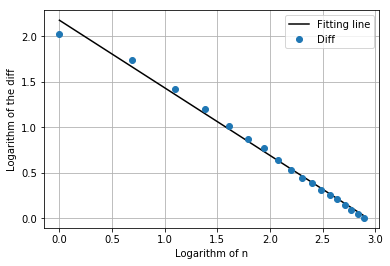

0.9927324082586092


In [28]:
#get the figure 4
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline

u_a=[98.56, 100.2875, 101.87666666666667, 102.405, 103.258, 103.17333333333333, 103.2585714285714, 103.335, 103.43555555555555,
 103.30499999999999, 103.4509090909091, 103.52999999999999, 103.91461538461539, 103.98, 104.00333333333333, 104.073125, 103.93411764705883,
 104.05833333333334]
b_u_a=[106.13000000000002, 105.96499999999996, 106.03999999999995, 105.74249999999992, 106.01399999999992, 105.575, 105.43000000000013,
 105.24250000000029, 105.13111111111154, 104.8550000000004, 104.91818181818245, 104.89750000000087, 105.21076923077008, 105.21285714285797,
 105.1633333333341, 105.17312500000084, 104.98588235294214, 105.06111111111217]
n_a=[152.29, 153.8725, 154.48833333333332, 154.88375, 155.34300000000002, 155.50416666666666, 155.4635714285714, 155.649375, 155.77499999999998,
 155.89249999999998, 155.92954545454543, 155.98541666666668, 156.07730769230767, 156.13607142857146, 156.145, 156.15281249999998,
 156.0885294117647, 156.0613888888889]
b_n_a=[157.57, 157.26, 156.7366666666667, 156.53000000000011, 156.71200000000024, 156.68333333333354, 156.45571428571435, 156.49624999999997,
 156.52666666666653, 156.57199999999972, 156.52272727272648, 156.52916666666587, 156.57615384615286, 156.60428571428423, 156.58533333333182,
 156.56999999999832, 156.46176470588074, 156.41222222222075]

value11=[]
value12=[]
for i in range(len(u_a)):
    value1 = b_u_a[i]-u_a[i]
    value11.append(value1)
    value2 = b_n_a[i]-n_a[i]
    value12.append(value2)
print(value11)
print(value12)


x_list=[]
value111=[]
for i in range(1,len(n_a)+1):  
    x_list.append(math.log(i))
    value111.append(math.log(value11[i-1]))

# print(value111)
# for j in range(len(value111)):
#     if value111[j] < 0:
#         x_list=x_list[0: j]
#         value111=value111[0:j]
#     break
# print(value111)
# print(x_list)
           
b, k=linear_regression(x_list,value111)
print(b, k)
r_2=judge(x_list,value111,k,b)
print(r_2)


# # x=np.linspace(1,18,18)
# plt.scatter(x_list,value11, color='b',label='WAA')
# plt.scatter(x_list,value12, color='r',label='MWAA')
# plt.show()

# x=np.linspace(1,18,18)

# plt.xlabel("n")
# plt.ylabel("Stage cumulative average gains") 
# plt.xlim(0, 18)
# plt.plot(x,value13, color='y',linestyle='-',label='MWAA')
# plt.plot(x,value14, color='b',linestyle='--',label='Benchmark')
# plt.legend()
# plt.savefig('D:\\e_shared_folder_new\\figure_norm_average.pdf', dpi=1000)
# plt.show()

# 阶段平均收益，对于均匀和正态分布。
# [98.56, 100.2875, 101.87666666666667, 102.405, 103.258, 103.17333333333333, 103.2585714285714, 103.335, 103.43555555555555,
#  103.30499999999999, 103.4509090909091, 103.52999999999999, 103.91461538461539, 103.98, 104.00333333333333, 104.073125, 103.93411764705883,
#  104.05833333333334]
# [106.13000000000002, 105.96499999999996, 106.03999999999995, 105.74249999999992, 106.01399999999992, 105.575, 105.43000000000013,
#  105.24250000000029, 105.13111111111154, 104.8550000000004, 104.91818181818245, 104.89750000000087, 105.21076923077008, 105.21285714285797,
#  105.1633333333341, 105.17312500000084, 104.98588235294214, 105.06111111111217]
# [152.29, 153.8725, 154.48833333333332, 154.88375, 155.34300000000002, 155.50416666666666, 155.4635714285714, 155.649375, 155.77499999999998,
#  155.89249999999998, 155.92954545454543, 155.98541666666668, 156.07730769230767, 156.13607142857146, 156.145, 156.15281249999998,
#  156.0885294117647, 156.0613888888889]
# [157.57, 157.26, 156.7366666666667, 156.53000000000011, 156.71200000000024, 156.68333333333354, 156.45571428571435, 156.49624999999997,
#  156.52666666666653, 156.57199999999972, 156.52272727272648, 156.52916666666587, 156.57615384615286, 156.60428571428423, 156.58533333333182,
#  156.56999999999832, 156.46176470588074, 156.41222222222075]

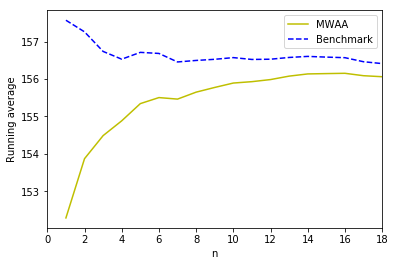

In [2]:
# get the the Figure 3, here use the data from one simulation
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline


a=[98.56, 100.2875, 101.87666666666667, 102.405, 103.258, 103.17333333333333, 103.2585714285714, 103.335, 103.43555555555555,
 103.30499999999999, 103.4509090909091, 103.52999999999999, 103.91461538461539, 103.98, 104.00333333333333, 104.073125, 103.93411764705883,
 104.05833333333334]
aa=[106.13000000000002, 105.96499999999996, 106.03999999999995, 105.74249999999992, 106.01399999999992, 105.575, 105.43000000000013,
 105.24250000000029, 105.13111111111154, 104.8550000000004, 104.91818181818245, 104.89750000000087, 105.21076923077008, 105.21285714285797,
 105.1633333333341, 105.17312500000084, 104.98588235294214, 105.06111111111217]
b=[152.29, 153.8725, 154.48833333333332, 154.88375, 155.34300000000002, 155.50416666666666, 155.4635714285714, 155.649375, 155.77499999999998,
 155.89249999999998, 155.92954545454543, 155.98541666666668, 156.07730769230767, 156.13607142857146, 156.145, 156.15281249999998,
 156.0885294117647, 156.0613888888889]
bb=[157.57, 157.26, 156.7366666666667, 156.53000000000011, 156.71200000000024, 156.68333333333354, 156.45571428571435, 156.49624999999997,
 156.52666666666653, 156.57199999999972, 156.52272727272648, 156.52916666666587, 156.57615384615286, 156.60428571428423, 156.58533333333182,
 156.56999999999832, 156.46176470588074, 156.41222222222075]



x=np.linspace(1,18,18)

plt.xlabel("n")
plt.ylabel("Running average") 
plt.xlim(0, 18)
plt.plot(x,b, color='y',linestyle='-',label='MWAA')
plt.plot(x,bb, color='b',linestyle='--',label='Benchmark')
plt.legend()
plt.savefig('D:\\e_shared_folder_new\\figure_norm_average.pdf', dpi=1000)
plt.show()

Text(0.5,0,'n')

Text(0,0.5,'Stage increment')

(0, 18)

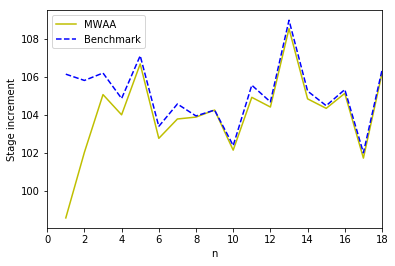

In [21]:
# one example to show the difference between the MWAA and optimal.
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


# aa=[0, 152.29, 307.745, 463.465, 619.535, 776.715, 933.025, 1088.245, 1245.195, 1401.975, 1558.925, 1715.225, 1871.825, 2029.0049999999997,
#  2185.905, 2342.175, 2498.4449999999997, 2653.505, 2809.105]
# bb=[0, 157.57, 314.52, 470.21000000000015, 626.1200000000005, 783.5600000000012, 940.1000000000012, 1095.1900000000005, 1251.9699999999998,
#  1408.7399999999986, 1565.719999999997, 1721.7499999999914, 1878.3499999999904, 2035.4899999999873,
#  2192.459999999979, 2348.7799999999775, 2505.119999999973, 2659.8499999999726, 2815.4199999999732]

aa=[0, 98.56, 200.575, 305.63, 409.62, 516.29, 619.04, 722.8099999999998, 826.68, 930.92, 1033.05, 1137.96, 1242.36, 1350.89, 1455.72,
1560.05, 1665.17, 1766.88, 1873.05]
bb=[0,106.13000000000002, 211.92999999999992, 318.11999999999983, 422.9699999999997, 530.0699999999996, 633.45, 738.0100000000009,
841.9400000000023, 946.1800000000038, 1048.550000000004, 1154.100000000007, 1258.7700000000104, 1367.7400000000112, 1472.9800000000116,
1577.4500000000114, 1682.7700000000134, 1784.7600000000164, 1891.100000000019]

e=[aa[i+1]-aa[i] for i in range(len(aa)-1)]
ee=[bb[i+1]-bb[i] for i in range(len(bb)-1)]


x=np.linspace(1,18,18)

plt.xlabel("n")
plt.ylabel("Stage increment") 
plt.xlim(0, 18)
plt.plot(x,e, color='y',linestyle='-',label='MWAA')
plt.plot(x,ee, color='b',linestyle='--',label='Benchmark')
plt.legend()
plt.savefig('D:\\e_shared_folder_new\\figure_uniform.pdf', dpi=1000)
plt.show()

In [18]:
#get the data in figure 2 in Section 4

B = 20
N = 20
M = 31
p = 1
c1 = 0.4
c2 = 0.5
u = 0
s = 0

list_1 = [0] * N
list_2 = [0] * N
Num = 100
for num in range(Num):
    init_w_for_A = [1 / (B + 1)] * (B + 1)
    # 记录各个专家对 对应的累计收益
    expert_profit_matrix = np.zeros((B + 1, B + 1))
    # 记录每一个提前订货专家对应实际执行常规订货的时段动作得到的累计收益
    accum_profit_A_list = [0] * (B + 1)
    # 分阶段保存newsvendor收益
    profit_per_stage_list = [0] * N
    # WAA（不继承）的收益阶段保存
    profit_per_stage_list_WAA = [0] * N
    #
    for n in range(N):
        # 计算提前订货
        weights = weight_update(n + 1, B, init_w_for_A, accum_profit_A_list)
#         print("第", n + 1, "阶段期初各提前订货专家的权重", weights)
        A = action(B, weights)
#         print("第", n + 1, "阶段提前订货为:", A)
        # 存储真实收益
        profit = []
        # 不继承WAA方法真实收益
        profit_WAA = []
        # 对应常规订货专家集
        varDelta = B - A
        init_w_for_y = [1 / (varDelta + 1)] * (varDelta + 1)
        # 每一阶段重新初始化累计收益对不继承的WAA方法（不继承）
        accum_profit_list_WAA = [0] * (varDelta + 1)
        for m in range(1, M):
            # 跨阶段用于更新专家权重的累计收益值
            tmp_list = expert_profit_matrix[
                A,
            ].tolist()
            accum_profit_list = tmp_list[0 : varDelta + 1]
            # 计算newsvendor的真实订货量
            weights = weight_update(
                m + n * (M - 1), varDelta, init_w_for_y, accum_profit_list
            )
#             print(
#                 "第",
#                 int((m + n * (M - 1)) / 30) + 1,
#                 "阶段下第",
#                 m + n * (M - 1) - int((m + n * (M - 1)) / 30) * (M - 1),
#                 "时段常规订货专家的权重",
#                 weights,
# #             )
            y = action(varDelta, weights)
#             print("第", n + 1, "阶段下对应的第", m, "时段的常规订货量", y)
            # 不继承WAA方法的订货量（不继承）
            weights = weight_update(
                m + n * (M - 1), varDelta, init_w_for_y, accum_profit_list_WAA
            )
            y_WAA = action(varDelta, weights)
            # 产生需求
            #         tr_n= truncnorm((0-10)/2,(21-10)/2,10,2)
            #         demand=int(list(tr_n.rvs(1))[0])
            # 产生正态分布需求(5,2)
            demand = round(np.random.normal(10, 2))
            demand = np.maximum(demand, 0)
            demand = np.minimum(demand, 20)
            # 产生均匀分布需求
#             demand = random.randint(0, 20)
            # y_WAA阶段内对应的专家收益累计
#             expert_profit_WAA = expert_profit(A, demand, p, c1, c2, u, s, varDelta)
#             accum_profit_list_WAA = [
#                 accum_profit_list_WAA[e] + expert_profit_WAA[e]
#                 for e in range(len(expert_profit_WAA))
#             ]
            # 同时计算其余提前订货专家对应下的每个时期的常规订货
            yy_list, profit_A_list = advance_expert_profit(d, p, c1, c2, u, s, n, m, M, B, expert_profit_matrix)
            accum_profit_A_list = [accum_profit_A_list[k] + profit_A_list[k] for k in range(len(profit_A_list))]
    #         yy_list = []  # 为输出动作而建
    #         for t in range(B + 1):
    #             #
    #             _varDelta = B - t
    #             _init_w_for_y = [1 / (_varDelta + 1)] * (_varDelta + 1)
    #             tmp_list = expert_profit_matrix[
    #                 t,
    #             ].tolist()
    #             accum_profit_list = tmp_list[0 : _varDelta + 1]
    #             weights = weight_update(
    #                 m + n * (M - 1), _varDelta, _init_w_for_y, accum_profit_list
    #             )
    #             y = action(_varDelta, weights)
    #             yy_list.append(y)
    #             _profit = newsvendor_profit(t, demand, y, p, c1, c2, u, s)
    #             accum_profit_A_list[t] += _profit
            # 输出每个提前订货专家所对应的常规订货
#             print("第", n + 1, "阶段下各个提前订货专家对应的第", m, "时段的常规订货量", yy_list)
            # 各个专家对 对应的累计收益矩阵更新
            expert_profit_matrix += profit_matrix(demand, p, c1, c2, u, s, B)

            # 计算newsvendor的真实收益
            _profit = newsvendor_profit(A, demand, y, p, c1, c2, u, s)
#             _profit_WAA = newsvendor_profit(A, demand, y_WAA, p, c1, c2, u, s)
            #       r=real_r2(z,demand,q,p,c1,c2,s,u)
            profit.append(_profit)
#             profit_WAA.append(_profit_WAA)
        tmp_profit = np.sum(profit)
        profit_per_stage_list[n] = tmp_profit
        list_1[n] += tmp_profit
        
        list_matrix = expert_profit_matrix[:, 0].tolist()
        list_2[n] += list_matrix[10]
#         tmp_profit_WAA = np.sum(profit_WAA)
#         profit_per_stage_list_WAA[n] = tmp_profit_WAA
#         print("前", n + 1, "阶段各个提前订货专家的阶段累计收益", accum_profit_A_list)
#     Total_profit_WAA = np.sum(profit_per_stage_list_WAA)
#     list_1 += Total_profit_WAA
    # 输出不继承的WAA
#     print("不继承WAA的累计收益", Total_profit_WAA)
    #
#     Total_profit = np.sum(profit_per_stage_list)
#     list_2 += Total_profit
    # 输出真实收益
#     print("真实累计收益:", Total_profit)
    # index=accum_p_tot_z_list.index(max(accum_p_tot_z_list))
    # print("最优专家为",index,"累计收益为",max(accum_p_tot_z_list))
    # print("提前订货专家的累计收益集",accum_p_tot_z_list)
#     list_matrix = expert_profit_matrix[:, 0].tolist()
#     list_3 += list_matrix[6]
#     index = list_matrix.index(max(list_matrix))
#     print("最优理论上界即最优的提前订货专家及其对应最优常规定订货专家组合：", (index, 0), "累计收益为：", max(list_matrix))
#     print("专家收益矩阵：", expert_profit_matrix)
list_1 = [i/100 for i in list_1]
tmp_vvv = 0
tmp_list = []
for ss in range(len(list_1)):
    tmp_vvv += list_1[ss]
    tmp_list.append(tmp_vvv)
print(tmp_list)

list_2 = [i/100 for i in list_2]
print(list_2)

ratio = []
for s in range(N):
    tmp_v = tmp_list[s]/list_2[s]
    ratio.append(tmp_v)
print(ratio)

# [151.35, 306.485, 463.135, 619.635, 775.525, 932.3149999999999, 1088.165, 1244.675, 1400.975, 1557.135, 1712.135, 1868.695, 2023.605, 2179.925, 2336.485, 2494.085, 2651.025, 2808.445]
# [156.53, 313.09, 469.87, 626.2, 782.09, 938.67, 1094.5, 1250.99, 1407.35, 1563.4, 1718.66, 1875.26, 2030.34, 2186.52, 2343.1, 2500.64, 2657.33, 2814.42]
# [0.9669073021146106, 0.9789038295697724, 0.9856662481111796, 0.9895161290322579, 0.9916058254165121, 0.9932297825646926, 0.9942119689355869, 0.9949519980175701, 0.9954702099690909, 0.9959927082000767, 0.9962034375618214, 0.996499152117573, 0.9966828215963829, 0.9969837915957779, 0.9971768170372585, 0.9973786710602086, 0.9976273176459078, 0.9978770048535756]

[151.555, 306.61, 463.29, 619.5600000000001, 776.48, 932.52, 1089.54, 1247.06, 1403.53, 1560.04, 1716.6, 1874.04, 2031.08, 2187.25, 2341.94, 2497.92, 2653.05, 2808.29, 2964.2799999999997, 3120.3599999999997]
[156.77, 313.23, 469.85, 626.0, 782.52, 938.48, 1095.0, 1252.61, 1409.16, 1565.39, 1721.92, 1879.18, 2035.9, 2191.9, 2346.82, 2503.07, 2658.41, 2813.67, 2969.91, 3126.07]
[0.9667347068954519, 0.9788653704945248, 0.9860380972650846, 0.9897124600638979, 0.992281347441599, 0.9936493052595686, 0.995013698630137, 0.9955692514030704, 0.9960047120270231, 0.9965823213384523, 0.996910425571455, 0.997264764418523, 0.9976324966845129, 0.9978785528536885, 0.9979205904159671, 0.9979425265773629, 0.9979837572082562, 0.9980879065419896, 0.9981043196595183, 0.9981734254191363]


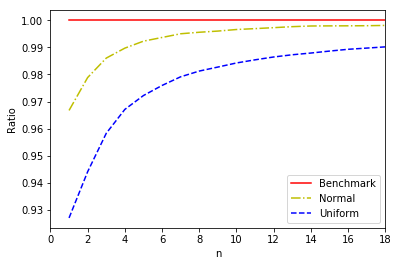

In [5]:
# draw the figure 2 in Section 4
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


n18_norm=[0.9667347068954519, 0.9788653704945248, 0.9860380972650846, 0.9897124600638979, 0.992281347441599, 0.9936493052595686, 0.995013698630137, 0.9955692514030704, 0.9960047120270231, 0.9965823213384523, 0.996910425571455, 0.997264764418523, 0.9976324966845129, 0.9978785528536885, 0.9979205904159671, 0.9979425265773629, 0.9979837572082562, 0.9980879065419896]
n18_uniform=[0.9270843327257026, 0.9441302652106085, 0.9582920039676196, 0.9671154349325667, 0.972226471375579, 0.9759481149384941, 0.979141380391942, 0.9812538892345962, 0.9827315457750204, 0.9842395170438116, 0.9854011087986786, 0.9864460362559444, 0.9872650247614184, 0.9879009257286512, 0.9886228044289839, 0.9892829212536768, 0.9897259690956148, 0.9901778213010874]
bench=[1]*18
x=np.linspace(1,18,18)
# x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]

plt.xlabel("n")
plt.ylabel("Ratio")
plt.xlim(0, 18)
plt.plot(x,bench, color='r',linestyle='-',label='Benchmark')
plt.plot(x,n18_norm, color='y',linestyle='-.',label='Normal')
plt.plot(x,n18_uniform, color='b',linestyle='--',label='Uniform')
plt.legend()
plt.savefig('D:\\e_shared_folder_new\\figure222.pdf', dpi=1000)
plt.show()


# a=[151.555, 306.61, 463.29, 619.5600000000001, 776.48, 932.52, 1089.54, 1247.06, 1403.53, 1560.04, 1716.6, 1874.04,
#     2031.08, 2187.25, 2341.94, 2497.92, 2653.05, 2808.29,2964.2799999999997, 3120.3599999999997]
# b=[156.29, 312.79, 469.75, 626.75, 783.1, 938.82, 1093.65, 1249.79, 1406.29]

# aa=[0, 150.995, 306.375, 463.18, 620.41, 776.52, 932.13, 1086.88, 1243.18, 1399.58]
# bb=[0,156.29, 312.79, 469.75, 626.75, 783.1, 938.82, 1093.65, 1249.79, 1406.29]

# e=[aa[i+1]-aa[i] for i in range(len(aa)-1)]
# ee=[bb[i+1]-bb[i] for i in range(len(bb)-1)]


# c=[97.88, 198.45, 297.505, 400.105, 501.055, 606.145, 709.705, 813.035, 919.735]
# d=[105.71, 210.4, 312.03, 415.56, 516.91, 622.75, 727.03, 831.02, 937.95] 

# cc=[0,97.88, 198.45, 297.505, 400.105, 501.055, 606.145, 709.705, 813.035, 919.735]
# dd=[0,105.71, 210.4, 312.03, 415.56, 516.91, 622.75, 727.03, 831.02, 937.95]

# f=[cc[i+1]-cc[i] for i in range(len(cc)-1)]
# ff=[dd[i+1]-dd[i] for i in range(len(dd)-1)]

# x=np.linspace(1,9,9)

# plt.xlabel("n")
# plt.ylabel("Stage increment")
# plt.plot(x,e, color='y',linestyle='-',label='MWAA')
# plt.plot(x,ee, color='b',linestyle='--',label='Optimal')
# plt.legend()
# plt.savefig('D:\\e_shared_folder_new\\figure22.pdf', dpi=1000)
# plt.show()

# plt.xlabel("n")
# plt.ylabel("Stage increment")
# plt.plot(x,f, color='y',linestyle='-',label='MWAA')
# plt.plot(x,ff, color='b',linestyle='--',label='Optimal')
# plt.legend()
# plt.savefig('D:\\e_shared_folder_new\\figure33.pdf', dpi=1000)
# plt.show()

# r_1 = []
# r_2 = []
# for i in range(len(a)):
#     ratio1=a[i]/b[i]
#     r_1.append(ratio1)
#     ratio2=c[i]/d[i]
#     r_2.append(ratio2)

# # #画图
# x=np.linspace(1,9,9)

# plt.xlabel("n")
# plt.ylabel("Ratio")
# plt.plot(x,r_1, color='y',linestyle='-',label='Normal')
# plt.plot(x,r_2, color='b',linestyle='--',label='Uniform')
# plt.legend()
# plt.savefig('D:\\e_shared_folder_new\\figure2.pdf', dpi=1000)
# plt.show()

In [25]:
#This section is for Section 4.2

B = 20
N = 18
M = 31
p = 1
c1 = 0.4
c2 = 0.5
u = 0
s = 0

list_1 = 0
list_2 = 0
list_3 = 0
Num = 100
for num in range(Num):
    init_w_for_A = [1 / (B + 1)] * (B + 1)
    # 记录各个专家对 对应的累计收益
    expert_profit_matrix = np.zeros((B + 1, B + 1))
    # 记录每一个提前订货专家对应实际执行常规订货的时段动作得到的累计收益
    accum_profit_A_list = [0] * (B + 1)
    # 分阶段保存newsvendor收益
    profit_per_stage_list = [0] * N
    # WAA（不继承）的收益阶段保存
    profit_per_stage_list_WAA = [0] * N
    #
    for n in range(N):
        # 计算提前订货
        weights = weight_update(n + 1, B, init_w_for_A, accum_profit_A_list)
#         print("第", n + 1, "阶段期初各提前订货专家的权重", weights)
        A = action(B, weights)
#         print("第", n + 1, "阶段提前订货为:", A)
        # 存储真实收益
        profit = []
        # 不继承WAA方法真实收益
        profit_WAA = []
        # 对应常规订货专家集
        varDelta = B - A
        init_w_for_y = [1 / (varDelta + 1)] * (varDelta + 1)
        # 每一阶段重新初始化累计收益对不继承的WAA方法（不继承）
        accum_profit_list_WAA = [0] * (varDelta + 1)
        for m in range(1, M):
            # 跨阶段用于更新专家权重的累计收益值
            tmp_list = expert_profit_matrix[
                A,
            ].tolist()
            accum_profit_list = tmp_list[0 : varDelta + 1]
            # 计算newsvendor的真实订货量
            weights = weight_update(
                m + n * (M - 1), varDelta, init_w_for_y, accum_profit_list
            )
#             print(
#                 "第",
#                 int((m + n * (M - 1)) / 30) + 1,
#                 "阶段下第",
#                 m + n * (M - 1) - int((m + n * (M - 1)) / 30) * (M - 1),
#                 "时段常规订货专家的权重",
#                 weights,
# #             )
            y = action(varDelta, weights)
#             print("第", n + 1, "阶段下对应的第", m, "时段的常规订货量", y)
            # 不继承WAA方法的订货量（不继承）
            weights = weight_update(
                m + n * (M - 1), varDelta, init_w_for_y, accum_profit_list_WAA
            )
            y_WAA = action(varDelta, weights)
            # 产生需求
            #         tr_n= truncnorm((0-10)/2,(21-10)/2,10,2)
            #         demand=int(list(tr_n.rvs(1))[0])
            # 产生正态分布需求(5,2)
            demand = round(np.random.normal(10, 5))
            demand = np.maximum(demand, 0)
            demand = np.minimum(demand, 20)
            # 产生均匀分布需求
#             demand = random.randint(0, 10)
            # y_WAA阶段内对应的专家收益累计
            expert_profit_WAA = expert_profit(A, demand, p, c1, c2, u, s, varDelta)
            accum_profit_list_WAA = [
                accum_profit_list_WAA[e] + expert_profit_WAA[e]
                for e in range(len(expert_profit_WAA))
            ]
            # 同时计算其余提前订货专家对应下的每个时期的常规订货
            yy_list, profit_A_list = advance_expert_profit(d, p, c1, c2, u, s, n, m, M, B, expert_profit_matrix)
            accum_profit_A_list = [accum_profit_A_list[k] + profit_A_list[k] for k in range(len(profit_A_list))]
    #         yy_list = []  # 为输出动作而建
    #         for t in range(B + 1):
    #             #
    #             _varDelta = B - t
    #             _init_w_for_y = [1 / (_varDelta + 1)] * (_varDelta + 1)
    #             tmp_list = expert_profit_matrix[
    #                 t,
    #             ].tolist()
    #             accum_profit_list = tmp_list[0 : _varDelta + 1]
    #             weights = weight_update(
    #                 m + n * (M - 1), _varDelta, _init_w_for_y, accum_profit_list
    #             )
    #             y = action(_varDelta, weights)
    #             yy_list.append(y)
    #             _profit = newsvendor_profit(t, demand, y, p, c1, c2, u, s)
    #             accum_profit_A_list[t] += _profit
            # 输出每个提前订货专家所对应的常规订货
#             print("第", n + 1, "阶段下各个提前订货专家对应的第", m, "时段的常规订货量", yy_list)
            # 各个专家对 对应的累计收益矩阵更新
            expert_profit_matrix += profit_matrix(demand, p, c1, c2, u, s, B)

            # 计算newsvendor的真实收益
            _profit = newsvendor_profit(A, demand, y, p, c1, c2, u, s)
            _profit_WAA = newsvendor_profit(A, demand, y_WAA, p, c1, c2, u, s)
            #       r=real_r2(z,demand,q,p,c1,c2,s,u)
            profit.append(_profit)
            profit_WAA.append(_profit_WAA)
        tmp_profit = np.sum(profit)
        profit_per_stage_list[n] = tmp_profit
        tmp_profit_WAA = np.sum(profit_WAA)
        profit_per_stage_list_WAA[n] = tmp_profit_WAA
#         print("前", n + 1, "阶段各个提前订货专家的阶段累计收益", accum_profit_A_list)
    Total_profit_WAA = np.sum(profit_per_stage_list_WAA)
    list_1 += Total_profit_WAA
    # 输出不继承的WAA
#     print("不继承WAA的累计收益", Total_profit_WAA)
    #
    Total_profit = np.sum(profit_per_stage_list)
    list_2 += Total_profit
    # 输出真实收益
#     print("真实累计收益:", Total_profit)
    # index=accum_p_tot_z_list.index(max(accum_p_tot_z_list))
    # print("最优专家为",index,"累计收益为",max(accum_p_tot_z_list)1400)
    # print("提前订货专家的累计收益集",accum_p_tot_z_list)
    list_matrix = expert_profit_matrix[:, 0].tolist()
    list_3 += list_matrix[11]
#     index = list_matrix.index(max(list_matrix))
#     print("最优理论上界即最优的提前订货专家及其对应最优常规定订货专家组合：", (index, 0), "累计收益为：", max(list_matrix))
#     print("专家收益矩阵：", expert_profit_matrix)

list_2 = list_2/Num
list_3 = list_3/Num
list_ratio = list_2/list_3

print(list_2)
print(list_3)
print(list_ratio)

2402

2211.3799999999997
2224.929999999975
0.9939099207615631


In [29]:
# Sensitivity analysis for demand, and prepare data for table 2 and figure 5
#画实验4.2的图2，灵敏性分析对于需求 作图ratio

B = 20
N = 18
M = 31
p = 1
c1 = 0.4
c2 = 0.5
u = 0
s = 0

list_1 = [0] * N
list_2 = [0] * N
Num = 100
for num in range(Num):
    init_w_for_A = [1 / (B + 1)] * (B + 1)
    # 记录各个专家对 对应的累计收益
    expert_profit_matrix = np.zeros((B + 1, B + 1))
    # 记录每一个提前订货专家对应实际执行常规订货的时段动作得到的累计收益
    accum_profit_A_list = [0] * (B + 1)
    # 分阶段保存newsvendor收益
    profit_per_stage_list = [0] * N
    # WAA（不继承）的收益阶段保存
    profit_per_stage_list_WAA = [0] * N
    #
    for n in range(N):
        # 计算提前订货
        weights = weight_update(n + 1, B, init_w_for_A, accum_profit_A_list)
#         print("第", n + 1, "阶段期初各提前订货专家的权重", weights)
        A = action(B, weights)
#         print("第", n + 1, "阶段提前订货为:", A)
        # 存储真实收益
        profit = []
        # 不继承WAA方法真实收益
        profit_WAA = []
        # 对应常规订货专家集
        varDelta = B - A
        init_w_for_y = [1 / (varDelta + 1)] * (varDelta + 1)
        # 每一阶段重新初始化累计收益对不继承的WAA方法（不继承）
        accum_profit_list_WAA = [0] * (varDelta + 1)
        for m in range(1, M):
            # 跨阶段用于更新专家权重的累计收益值
            tmp_list = expert_profit_matrix[
                A,
            ].tolist()
            accum_profit_list = tmp_list[0 : varDelta + 1]
            # 计算newsvendor的真实订货量
            weights = weight_update(
                m + n * (M - 1), varDelta, init_w_for_y, accum_profit_list
            )
#             print(
#                 "第",
#                 int((m + n * (M - 1)) / 30) + 1,
#                 "阶段下第",
#                 m + n * (M - 1) - int((m + n * (M - 1)) / 30) * (M - 1),
#                 "时段常规订货专家的权重",
#                 weights,
# #             )
            y = action(varDelta, weights)
#             print("第", n + 1, "阶段下对应的第", m, "时段的常规订货量", y)
            # 不继承WAA方法的订货量（不继承）
            weights = weight_update(
                m + n * (M - 1), varDelta, init_w_for_y, accum_profit_list_WAA
            )
            y_WAA = action(varDelta, weights)
            # 产生需求
            #         tr_n= truncnorm((0-10)/2,(21-10)/2,10,2)
            #         demand=int(list(tr_n.rvs(1))[0])
            # 产生正态分布需求(5,2)
            demand = round(np.random.normal(10, 5))
            demand = np.maximum(demand, 0)
            demand = np.minimum(demand, 20)
            # 产生均匀分布需求
#             demand = random.randint(0, 10)
            # y_WAA阶段内对应的专家收益累计
#             expert_profit_WAA = expert_profit(A, demand, p, c1, c2, u, s, varDelta)
#             accum_profit_list_WAA = [
#                 accum_profit_list_WAA[e] + expert_profit_WAA[e]
#                 for e in range(len(expert_profit_WAA))
#             ]
            # 同时计算其余提前订货专家对应下的每个时期的常规订货
            yy_list, profit_A_list = advance_expert_profit(d, p, c1, c2, u, s, n, m, M, B, expert_profit_matrix)
            accum_profit_A_list = [accum_profit_A_list[k] + profit_A_list[k] for k in range(len(profit_A_list))]
    #         yy_list = []  # 为输出动作而建
    #         for t in range(B + 1):
    #             #
    #             _varDelta = B - t
    #             _init_w_for_y = [1 / (_varDelta + 1)] * (_varDelta + 1)
    #             tmp_list = expert_profit_matrix[
    #                 t,
    #             ].tolist()
    #             accum_profit_list = tmp_list[0 : _varDelta + 1]
    #             weights = weight_update(
    #                 m + n * (M - 1), _varDelta, _init_w_for_y, accum_profit_list
    #             )
    #             y = action(_varDelta, weights)
    #             yy_list.append(y)
    #             _profit = newsvendor_profit(t, demand, y, p, c1, c2, u, s)
    #             accum_profit_A_list[t] += _profit
            # 输出每个提前订货专家所对应的常规订货
#             print("第", n + 1, "阶段下各个提前订货专家对应的第", m, "时段的常规订货量", yy_list)
            # 各个专家对 对应的累计收益矩阵更新
            expert_profit_matrix += profit_matrix(demand, p, c1, c2, u, s, B)

            # 计算newsvendor的真实收益
            _profit = newsvendor_profit(A, demand, y, p, c1, c2, u, s)
#             _profit_WAA = newsvendor_profit(A, demand, y_WAA, p, c1, c2, u, s)
            #       r=real_r2(z,demand,q,p,c1,c2,s,u)
            profit.append(_profit)
#             profit_WAA.append(_profit_WAA)
        tmp_profit = np.sum(profit)
        profit_per_stage_list[n] = tmp_profit
        list_1[n] += tmp_profit
        
        list_matrix = expert_profit_matrix[:, 0].tolist()
        list_2[n] += list_matrix[11]
#         tmp_profit_WAA = np.sum(profit_WAA)
#         profit_per_stage_list_WAA[n] = tmp_profit_WAA
#         print("前", n + 1, "阶段各个提前订货专家的阶段累计收益", accum_profit_A_list)
#     Total_profit_WAA = np.sum(profit_per_stage_list_WAA)
#     list_1 += Total_profit_WAA
    # 输出不继承的WAA
#     print("不继承WAA的累计收益", Total_profit_WAA)
    #
#     Total_profit = np.sum(profit_per_stage_list)
#     list_2 += Total_profit
    # 输出真实收益
#     print("真实累计收益:", Total_profit)
    # index=accum_p_tot_z_list.index(max(accum_p_tot_z_list))
    # print("最优专家为",index,"累计收益为",max(accum_p_tot_z_list))
    # print("提前订货专家的累计收益集",accum_p_tot_z_list)
#     list_matrix = expert_profit_matrix[:, 0].tolist()
#     list_3 += list_matrix[6]
#     index = list_matrix.index(max(list_matrix))
#     print("最优理论上界即最优的提前订货专家及其对应最优常规定订货专家组合：", (index, 0), "累计收益为：", max(list_matrix))
#     print("专家收益矩阵：", expert_profit_matrix)
list_1 = [i/100 for i in list_1]
tmp_vvv = 0
tmp_list = []
for ss in range(len(list_1)):
    tmp_vvv += list_1[ss]
    tmp_list.append(tmp_vvv)
print(tmp_list)

list_2 = [i/100 for i in list_2]
print(list_2)

ratio = []
for s in range(N):
    tmp_v = tmp_list[s]/list_2[s]
    ratio.append(tmp_v)
print(ratio)

[116.66, 235.78, 356.425, 478.9, 601.81, 725.51, 847.61, 970.38, 1091.94, 1218.15, 1339.8600000000001, 1463.0600000000002, 1583.1200000000001, 1707.69, 1829.23, 1952.64, 2076.9500000000003, 2200.5000000000005]
[123.03999999999998, 245.59999999999997, 367.53000000000014, 490.7200000000004, 614.2600000000008, 738.3000000000013, 860.6900000000013, 983.7100000000024, 1105.680000000001, 1232.2299999999998, 1353.8899999999983, 1477.1299999999956, 1597.3099999999915, 1721.9699999999898, 1843.929999999986, 1967.3899999999803, 2091.889999999978, 2215.609999999975]
[0.9481469440832251, 0.9600162866449513, 0.969784779473784, 0.9759129442451898, 0.9797317096994744, 0.982676418799944, 0.9848028907039686, 0.9864492584196538, 0.9875732580855212, 0.9885735617538935, 0.9896372674294085, 0.9904747720241309, 0.991116314303428, 0.9917071725988317, 0.9920278969375269, 0.9925027574604016, 0.9928581330758415, 0.9931802077080466]


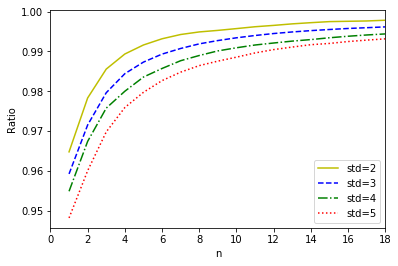

In [1]:
# get figure 5 in section 4.2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

a = [0.9647602176388715, 0.9783133678624765, 0.9855800905362035, 0.9893695073129489, 0.9916371557412537, 0.9931965924541116, 0.9942710517200515, 0.9949183751554381, 0.9953072095428349,
     0.9957569304531912, 0.9962227942625947, 0.9965632359273466, 0.9969477607908876, 0.9972465176546903, 0.9975142181609145, 0.9975946663472969, 0.9976764891506986, 0.9978578172808747]
b = [0.9592138776072142, 0.9715174724748684, 0.9796363055580904, 0.9844205508111253, 0.9873326665113776, 0.9893434856562277, 0.990758226597128, 0.9919188195045827, 0.9927482661382521,
     0.9934425892698179, 0.99401954177898, 0.9945157432784292, 0.9949127216279341, 0.9952479916086344, 0.9955305856237371, 0.9957876078848871, 0.9959817207689995, 0.9961892864510619]
c = [0.9548486403283738, 0.9673965306801793, 0.9757607141095821, 0.9800048136559709, 0.9835686321034508, 0.9857307135879699, 0.9876807372490851, 0.9889921676819664, 0.9901493224575716,
     0.9909336419753096, 0.9916320250499403, 0.992133045538044, 0.9926116249857312, 0.9929941139942635, 0.9934510914021506, 0.993834244799542, 0.9941528639613033, 0.9944187963726412]
d = [0.9481469440832251, 0.9600162866449513, 0.969784779473784, 0.9759129442451898, 0.9797317096994744, 0.982676418799944, 0.9848028907039686, 0.9864492584196538, 0.9875732580855212,
     0.9885735617538935, 0.9896372674294085, 0.9904747720241309, 0.991116314303428, 0.9917071725988317, 0.9920278969375269, 0.9925027574604016, 0.9928581330758415, 0.9931802077080466]
# #画图
x=np.linspace(1,18,18)

plt.xlabel("n")
plt.ylabel("Ratio")
plt.xlim(0, 18)
plt.plot(x,a, color='y',linestyle='-',label='std=2')
plt.plot(x,b, color='b',linestyle='--',label='std=3')
plt.plot(x,c, color='g',linestyle='-.',label='std=4')
plt.plot(x,d, color='r',linestyle=':',label='std=5')
plt.legend()
plt.savefig('D:\\e_shared_folder_new\\figure5.pdf', dpi=1000)
plt.show()

In [51]:
# Sensitivity analysis for price, and prepare data for table 3 and figure 6
# 对于论文6.2部分 关于价格取值的灵敏性分析
B = 20
N = 18
M = 31
p = 1.4
c1 = 0.4
c2 = 0.5
u = 0
s = 0

# list_1 = 0
list_2 = 0
list_3 = 0
list_4 = 0
Num = 100
for num in range(Num):
    init_w_for_A = [1 / (B + 1)] * (B + 1)
    # 记录各个专家对 对应的累计收益
    expert_profit_matrix = np.zeros((B + 1, B + 1))
    # 记录每一个提前订货专家对应实际执行常规订货的时段动作得到的累计收益
    accum_profit_A_list = [0] * (B + 1)
    # 分阶段保存newsvendor收益
    profit_per_stage_list = [0] * N
    # WAA（不继承）的收益阶段保存
#     profit_per_stage_list_WAA = [0] * N
    #
    for n in range(N):
        # 计算提前订货
        weights = weight_update(n + 1, B, init_w_for_A, accum_profit_A_list)
#         print("第", n + 1, "阶段期初各提前订货专家的权重", weights)
        A = action(B, weights)
#         print("第", n + 1, "阶段提前订货为:", A)
        # 存储真实收益
        profit = []
        # 不继承WAA方法真实收益
#         profit_WAA = []
        # 对应常规订货专家集
        varDelta = B - A
        init_w_for_y = [1 / (varDelta + 1)] * (varDelta + 1)
        # 每一阶段重新初始化累计收益对不继承的WAA方法（不继承）
        accum_profit_list_WAA = [0] * (varDelta + 1)
        for m in range(1, M):
            # 跨阶段用于更新专家权重的累计收益值
            tmp_list = expert_profit_matrix[
                A,
            ].tolist()
            accum_profit_list = tmp_list[0 : varDelta + 1]
            # 计算newsvendor的真实订货量
            weights = weight_update(
                m + n * (M - 1), varDelta, init_w_for_y, accum_profit_list
            )
#             print(
#                 "第",
#                 int((m + n * (M - 1)) / 30) + 1,
#                 "阶段下第",
#                 m + n * (M - 1) - int((m + n * (M - 1)) / 30) * (M - 1),
#                 "时段常规订货专家的权重",
#                 weights,
# #             )
            y = action(varDelta, weights)
#             print("第", n + 1, "阶段下对应的第", m, "时段的常规订货量", y)
            # 不继承WAA方法的订货量（不继承）
#             weights = weight_update(
#                 m + n * (M - 1), varDelta, init_w_for_y, accum_profit_list_WAA
#             )
#             y_WAA = action(varDelta, weights)
            # 产生需求
            #         tr_n= truncnorm((0-10)/2,(21-10)/2,10,2)
            #         demand=int(list(tr_n.rvs(1))[0])
            # 产生正态分布需求(5,2)
#             demand = round(np.random.normal(10, 2))
#             demand = np.maximum(demand, 0)
#             demand = np.minimum(demand, 20)
            # 产生均匀分布需求
            demand = random.randint(0, 20)
            # y_WAA阶段内对应的专家收益累计
#             expert_profit_WAA = expert_profit(A, demand, p, c1, c2, u, s, varDelta)
#             accum_profit_list_WAA = [
#                 accum_profit_list_WAA[e] + expert_profit_WAA[e]
#                 for e in range(len(expert_profit_WAA))
#             ]
            # 同时计算其余提前订货专家对应下的每个时期的常规订货
            yy_list, profit_A_list = advance_expert_profit(d, p, c1, c2, u, s, n, m, M, B, expert_profit_matrix)
            accum_profit_A_list = [accum_profit_A_list[k] + profit_A_list[k] for k in range(len(profit_A_list))]
    #         yy_list = []  # 为输出动作而建
    #         for t in range(B + 1):
    #             #
    #             _varDelta = B - t
    #             _init_w_for_y = [1 / (_varDelta + 1)] * (_varDelta + 1)
    #             tmp_list = expert_profit_matrix[
    #                 t,
    #             ].tolist()
    #             accum_profit_list = tmp_list[0 : _varDelta + 1]
    #             weights = weight_update(
    #                 m + n * (M - 1), _varDelta, _init_w_for_y, accum_profit_list
    #             )
    #             y = action(_varDelta, weights)
    #             yy_list.append(y)
    #             _profit = newsvendor_profit(t, demand, y, p, c1, c2, u, s)
    #             accum_profit_A_list[t] += _profit
            # 输出每个提前订货专家所对应的常规订货
#             print("第", n + 1, "阶段下各个提前订货专家对应的第", m, "时段的常规订货量", yy_list)
            # 各个专家对 对应的累计收益矩阵更新
            expert_profit_matrix += profit_matrix(demand, p, c1, c2, u, s, B)

            # 计算newsvendor的真实收益
            _profit = newsvendor_profit(A, demand, y, p, c1, c2, u, s)
#             _profit_WAA = newsvendor_profit(A, demand, y_WAA, p, c1, c2, u, s)
            #       r=real_r2(z,demand,q,p,c1,c2,s,u)
            profit.append(_profit)
#             profit_WAA.append(_profit_WAA)
        tmp_profit = np.sum(profit)
        profit_per_stage_list[n] = tmp_profit
#         tmp_profit_WAA = np.sum(profit_WAA)
#         profit_per_stage_list_WAA[n] = tmp_profit_WAA
#         print("前", n + 1, "阶段各个提前订货专家的阶段累计收益", accum_profit_A_list)
#     Total_profit_WAA = np.sum(profit_per_stage_list_WAA)
#     list_1 += Total_profit_WAA
    # 输出不继承的WAA
#     print("不继承WAA的累计收益", Total_profit_WAA)
    #
    Total_profit = np.sum(profit_per_stage_list)
    list_2 += Total_profit
    # 输出真实收益
#     print("真实累计收益:", Total_profit)
    # index=accum_p_tot_z_list.index(max(accum_p_tot_z_list))
    # print("最优专家为",index,"累计收益为",max(accum_p_tot_z_list))
    # print("提前订货专家的累计收益集",accum_p_tot_z_list)
    list_matrix = expert_profit_matrix[:, 0].tolist()
    list_3 += list_matrix[14]
#     list_4 += list_matrix[7]
#     index = list_matrix.index(max(list_matrix))
#     print("最优理论上界即最优的提前订货专家及其对应最优常规定订货专家组合：", (index, 0), "累计收益为：", max(list_matrix))
#     print("专家收益矩阵：", expert_profit_matrix)

list_2 = list_2/Num
list_3 = list_3/Num
# list_4 = list_4/Num

list_ratio1 = list_2/list_3
# list_ratio2 = list_2/list_4

print(list_2)
print(list_3)
# print(list_4)
print(list_ratio1)
# print(list_ratio2)

# 141.43299999999996
# 162.0540000000005
# 0.8727522924457249

3628.769
3780.7419999999997
0.9598033930905626


In [64]:
# Sensitivity analysis for price, and prepare data for table 3 and figure 6

B = 20
N = 10
M = 31
p = 0.8
c1 = 0.4
c2 = 0.5
u = 0
s = 0

list_1 = [0] * N
list_2 = [0] * N
Num = 100
for num in range(Num):
    init_w_for_A = [1 / (B + 1)] * (B + 1)
    # 记录各个专家对 对应的累计收益
    expert_profit_matrix = np.zeros((B + 1, B + 1))
    # 记录每一个提前订货专家对应实际执行常规订货的时段动作得到的累计收益
    accum_profit_A_list = [0] * (B + 1)
    # 分阶段保存newsvendor收益
    profit_per_stage_list = [0] * N
    # WAA（不继承）的收益阶段保存
    profit_per_stage_list_WAA = [0] * N
    #
    for n in range(N):
        # 计算提前订货
        weights = weight_update(n + 1, B, init_w_for_A, accum_profit_A_list)
#         print("第", n + 1, "阶段期初各提前订货专家的权重", weights)
        A = action(B, weights)
#         print("第", n + 1, "阶段提前订货为:", A)
        # 存储真实收益
        profit = []
        # 不继承WAA方法真实收益
        profit_WAA = []
        # 对应常规订货专家集
        varDelta = B - A
        init_w_for_y = [1 / (varDelta + 1)] * (varDelta + 1)
        # 每一阶段重新初始化累计收益对不继承的WAA方法（不继承）
        accum_profit_list_WAA = [0] * (varDelta + 1)
        for m in range(1, M):
            # 跨阶段用于更新专家权重的累计收益值
            tmp_list = expert_profit_matrix[
                A,
            ].tolist()
            accum_profit_list = tmp_list[0 : varDelta + 1]
            # 计算newsvendor的真实订货量
            weights = weight_update(
                m + n * (M - 1), varDelta, init_w_for_y, accum_profit_list
            )
#             print(
#                 "第",
#                 int((m + n * (M - 1)) / 30) + 1,
#                 "阶段下第",
#                 m + n * (M - 1) - int((m + n * (M - 1)) / 30) * (M - 1),
#                 "时段常规订货专家的权重",
#                 weights,
# #             )
            y = action(varDelta, weights)
#             print("第", n + 1, "阶段下对应的第", m, "时段的常规订货量", y)
            # 不继承WAA方法的订货量（不继承）
            weights = weight_update(
                m + n * (M - 1), varDelta, init_w_for_y, accum_profit_list_WAA
            )
            y_WAA = action(varDelta, weights)
            # 产生需求
            #         tr_n= truncnorm((0-10)/2,(21-10)/2,10,2)
            #         demand=int(list(tr_n.rvs(1))[0])
            # 产生正态分布需求(5,2)
#             demand = round(np.random.normal(5, 5))
#             demand = np.maximum(demand, 0)
#             demand = np.minimum(demand, 10)
            # 产生均匀分布需求
            demand = random.randint(0, 20)
            # y_WAA阶段内对应的专家收益累计
#             expert_profit_WAA = expert_profit(A, demand, p, c1, c2, u, s, varDelta)
#             accum_profit_list_WAA = [
#                 accum_profit_list_WAA[e] + expert_profit_WAA[e]
#                 for e in range(len(expert_profit_WAA))
#             ]
            # 同时计算其余提前订货专家对应下的每个时期的常规订货
            yy_list, profit_A_list = advance_expert_profit(d, p, c1, c2, u, s, n, m, M, B, expert_profit_matrix)
            accum_profit_A_list = [accum_profit_A_list[k] + profit_A_list[k] for k in range(len(profit_A_list))]
    #         yy_list = []  # 为输出动作而建
    #         for t in range(B + 1):
    #             #
    #             _varDelta = B - t
    #             _init_w_for_y = [1 / (_varDelta + 1)] * (_varDelta + 1)
    #             tmp_list = expert_profit_matrix[
    #                 t,
    #             ].tolist()
    #             accum_profit_list = tmp_list[0 : _varDelta + 1]
    #             weights = weight_update(
    #                 m + n * (M - 1), _varDelta, _init_w_for_y, accum_profit_list
    #             )
    #             y = action(_varDelta, weights)
    #             yy_list.append(y)
    #             _profit = newsvendor_profit(t, demand, y, p, c1, c2, u, s)
    #             accum_profit_A_list[t] += _profit
            # 输出每个提前订货专家所对应的常规订货
#             print("第", n + 1, "阶段下各个提前订货专家对应的第", m, "时段的常规订货量", yy_list)
            # 各个专家对 对应的累计收益矩阵更新
            expert_profit_matrix += profit_matrix(demand, p, c1, c2, u, s, B)

            # 计算newsvendor的真实收益
            _profit = newsvendor_profit(A, demand, y, p, c1, c2, u, s)
#             _profit_WAA = newsvendor_profit(A, demand, y_WAA, p, c1, c2, u, s)
            #       r=real_r2(z,demand,q,p,c1,c2,s,u)
            profit.append(_profit)
#             profit_WAA.append(_profit_WAA)
        tmp_profit = np.sum(profit)
        profit_per_stage_list[n] = tmp_profit
        list_1[n] += tmp_profit
        
        list_matrix = expert_profit_matrix[:, 0].tolist()
        list_2[n] += list_matrix[14]
#         tmp_profit_WAA = np.sum(profit_WAA)
#         profit_per_stage_list_WAA[n] = tmp_profit_WAA
#         print("前", n + 1, "阶段各个提前订货专家的阶段累计收益", accum_profit_A_list)
#     Total_profit_WAA = np.sum(profit_per_stage_list_WAA)
#     list_1 += Total_profit_WAA
    # 输出不继承的WAA
#     print("不继承WAA的累计收益", Total_profit_WAA)
    #
#     Total_profit = np.sum(profit_per_stage_list)
#     list_2 += Total_profit
    # 输出真实收益
#     print("真实累计收益:", Total_profit)
    # index=accum_p_tot_z_list.index(max(accum_p_tot_z_list))
    # print("最优专家为",index,"累计收益为",max(accum_p_tot_z_list))
    # print("提前订货专家的累计收益集",accum_p_tot_z_list)
#     list_matrix = expert_profit_matrix[:, 0].tolist()
#     list_3 += list_matrix[6]
#     index = list_matrix.index(max(list_matrix))
#     print("最优理论上界即最优的提前订货专家及其对应最优常规定订货专家组合：", (index, 0), "累计收益为：", max(list_matrix))
#     print("专家收益矩阵：", expert_profit_matrix)
list_1 = [i/100 for i in list_1]
tmp_vvv = 0
tmp_list = []
for ss in range(len(list_1)):
    tmp_vvv += list_1[ss]
    tmp_list.append(tmp_vvv)
print(tmp_list)

list_2 = [i/100 for i in list_2]
print(list_2)

ratio = []
for s in range(N):
    tmp_v = tmp_list[s]/list_2[s]
    ratio.append(tmp_v)
print(ratio)

[194.653, 399.747, 609.0810000000001, 818.421, 1040.393, 1247.487, 1459.3310000000001, 1671.825, 1885.817, 2094.667]
[207.956, 416.62600000000003, 626.9480000000001, 837.6199999999997, 1059.9260000000002, 1268.1340000000002, 1480.1639999999998, 1693.2439999999997, 1906.8419999999999, 2116.422]
[0.9360297370597627, 0.9594864458771175, 0.97150162373913, 0.9770791050834512, 0.9815713549813854, 0.9837185975614563, 0.9859252082877306, 0.9873503169064827, 0.9889739160349941, 0.9897208590725289]


Text(0.5,0,'n')

Text(0,0.5,'Ratio')

(0, 18)

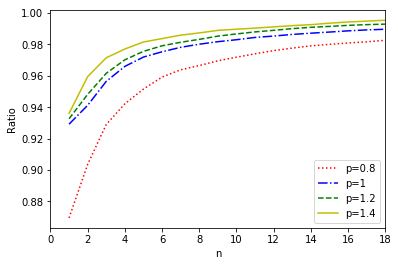

In [81]:
#get the figure 6 in Section 4.2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

a = [0.8693991479359485, 0.9035197651102838, 0.9289747641399827, 0.9421672432470205, 0.9515521713664122, 0.9591978029586213, 0.9638551843681056, 0.9665251018576063, 0.9695907511607171,
     0.9718693787186937, 0.9740403064999559, 0.9760508703014662, 0.9776793792376715, 0.9790970726018465, 0.9800589753040918, 0.9809247606963757, 0.9816667480031881, 0.9826452699325654]
b = [0.9291621541793835, 0.9411948326369883, 0.9564669788470861, 0.9660022042263652, 0.9719581839224396, 0.9753283436796831, 0.9781622780495839, 0.9801499885642729, 0.9817532300847058,
     0.9830095919800614, 0.9844678895066266, 0.9853337180226883, 0.9863909391138513, 0.9871689083257617, 0.9878951728389438, 0.9886684700931696, 0.9892649908752322, 0.9896761983743366]
c = [0.9326202230755161, 0.9481532326599992, 0.9616056301316299, 0.9702071370107567, 0.9756028587588055, 0.9791338209575016, 0.9813752732392284, 0.9832397158701877, 0.985292552809052,
     0.9867018872991388, 0.9879978984008123, 0.9889993116503155, 0.990076688240804, 0.9909184771944078, 0.9915048149079854, 0.9921604703396661, 0.9926297445359973, 0.9929461402481632]
d = [0.9360297370597627, 0.9594864458771175, 0.97150162373913, 0.9770791050834512, 0.9815713549813854, 0.9837185975614563, 0.9859252082877306, 0.9873503169064827, 0.9889739160349941,
     0.9897208590725289,0.9904124161770821, 0.991209820971184, 0.9919984113989281, 0.9926125980421969, 0.9935504137619093, 0.9943210598023828, 0.9948612794487083, 0.9954296104284558]

# #画图
x=np.linspace(1,18,18)

plt.xlabel("n")
plt.ylabel("Ratio")
plt.xlim(0,18)
plt.plot(x,a, color='r',linestyle=':',label='p=0.8')
plt.plot(x,b, color='b',linestyle='-.',label='p=1')
plt.plot(x,c, color='g',linestyle='--',label='p=1.2')
plt.plot(x,d, color='y',linestyle='-',label='p=1.4')
# plt.plot(x,e, color='y',linestyle='-',label='p=1.6')
plt.legend()
plt.savefig('D:\\e_shared_folder_new\\figure6.pdf', dpi=1000)
plt.show()